In [21]:
import os
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import subprocess

load checkpoint from http path: https://download.openmmlab.com/mmpose/face/hrnetv2/hrnetv2_w18_aflw_256x256-f2bbc62b_20210125.pth


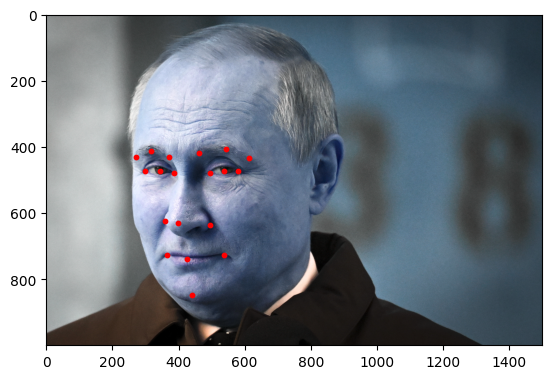

In [22]:
from image_getter import ImageGetter
img = input()
dict = ImageGetter(img)
obj = dict[0]
plt.imshow(obj['image'])
plt.scatter(obj['keypoints'][:, 0], obj['keypoints'][:, 1], s=10, c='r')